# Brainmix-register

## Introduction

Welcome to Brainmix-register!

Brainmix-register is an automatic python image registration and alignment library aimed at helping neuroscience researchers develop a comprehensive image pipeline.

Brainmix-register helps you automatically load, pre-process, register, and view your image data.

Brainmix-register was developed for Santiago Jaramillo's [Jaralab](http://jaralab.uoregon.edu/) by Thunder Shiviah and is licensed under the MIT license (see README.md for more information).

## Installation

Currently, brainmix_register is being developed using python 2.7. The recommended way to install is by downloading the repository via github:

git clone git@github.com:ThunderShiviah/brainmix_register.git 
Then navigate to the top directory (the directory containing setup.py) and run the following command:

`python setup.py install`

To uninstall use pip:

`pip uninstall brainmix_register`

### Testing 

To run tests, navigate to the directory above tests and run the following command:

`nosetests`

## Quickstart Tutorial

To get a feel for the brainmix-register library (henceforth known as brainmix), we'll start by grabbing a numpy stack of sample coronal brain slice images from the **data** submodule and registering it using the *registration* command from the **registration** submodule.



In [21]:
import sys
from skimage import io
import matplotlib.pyplot as plt
sys.path.append('../brainmix_register/brainmix_register/')

import brainmix_register as bm
from brainmix_register import data
from brainmix_register.registration import overlay_pics, registration

%matplotlib inline

### Load some test data 

Brainmix data consists of n grayscale images in the form of numpy array stacks. In the **data** submodule you can find a sample image (`data.image()`), a sample stack of three images (`data.test_stack()`), and an eighteen image stack (`data.all_stack()`). All images are from a set of coronal mouse brain slices provided by the Jaralab at the University of Oregon.

We'll start by grabbing some test data using the `data.test_stack()` function.

In [26]:
stack = data.test_stack()

We can check the dimensions of our data:

In [27]:
stack.shape

(3, 1040, 1388)

Note that the first number (3 in this case) refers to the number of images in our stack). The second number (1040) is the vertical pixels, and the third number (1388) refers to the horizontal pixels. See [A Crash Course on Numpy for Images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html) for more information.


Also note that if our image was color, we would have a fourth number on the end refering to RGB values. 

Let's take a look at our image stack:

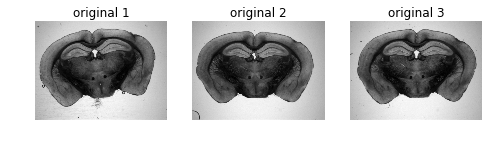

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))

plt.gray()

ax[0].imshow(stack[0])
ax[0].axis('off')
ax[0].set_title('original 1')
ax[1].imshow(stack[1])
ax[1].axis('off')
ax[1].set_title('original 2')
ax[2].imshow(stack[2])
ax[2].axis('off')
ax[2].set_title('original 3')

### Aligning the images

The images in our test stack are somewhat aligned but we would like them to be more centered. Furthermore, we don't want to register (align) the images in such a way that we distort the data in any way. Therefore, we want to apply a rigid registration.

First we will look at how unaligned the pre-registered images are by overlaying each image with the first (*original 1* in this case). We're overlaying each image with the first image because when we apply the registration algorithm, **the registration algorithm will choose the first image in the stack as the target image (also known as the destination image) by which the rest will be registered**. Therefore checking the pre-registration alignment with the first image and comparing to the post-registered stack will give us a good idea as to how well the algorithm was able to line up each image to the target image.

To overlay images, we can use the *overlay_pics* method from the **registration** library.



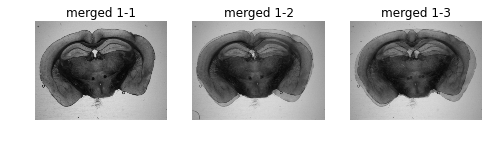

In [29]:
from brainmix_register.registration import overlay_pics

merged = [overlay_pics(stack[0], img) for img in stack]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))

plt.gray()

ax[0].imshow(merged[0])
ax[0].axis('off')
ax[0].set_title('merged 1-1')
ax[1].imshow(merged[1])
ax[1].axis('off')
ax[1].set_title('merged 1-2')
ax[2].imshow(merged[2])
ax[2].axis('off')
ax[2].set_title('merged 1-3')

Next we apply the rigid registration using the 

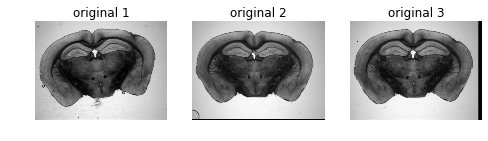

In [24]:
reg_stack = registration(stack)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))

plt.gray()

ax[0].imshow(reg_stack[0])
ax[0].axis('off')
ax[0].set_title('original 1')
ax[1].imshow(reg_stack[1])
ax[1].axis('off')
ax[1].set_title('original 2')
ax[2].imshow(reg_stack[2])
ax[2].axis('off')
ax[2].set_title('original 3')


merged = [overlay_pics(stack[0], img) for img in stack]
merged_reg = [overlay_pics(reg_stack[0], img) for img in reg_stack]

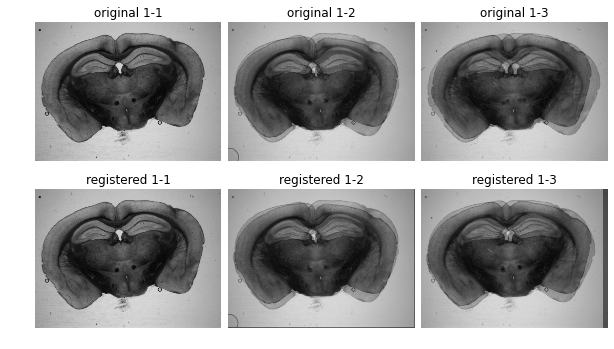

In [25]:

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

plt.gray()

ax[0, 0].imshow(merged[0])
ax[0, 0].axis('off')
ax[0, 0].set_title('original 1-1')
ax[0, 1].imshow(merged[1])
ax[0, 1].axis('off')
ax[0, 1].set_title('original 1-2')
ax[0, 2].imshow(merged[2])
ax[0, 2].axis('off')
ax[0, 2].set_title('original 1-3')

ax[1, 0].imshow(merged_reg[0])
ax[1, 0].axis('off')
ax[1, 0].set_title('registered 1-1')
ax[1, 1].imshow(merged_reg[1])
ax[1, 1].axis('off')
ax[1, 1].set_title('registered 1-2')
ax[1, 2].imshow(merged_reg[2])
ax[1, 2].axis('off')
ax[1, 2].set_title('registered 1-3')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

plt.show()